# Tensorflow Example

### A Multi Layer Perceptron to classify hand-written digits from MNIST dataset using Tensorflow.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
batch_xs,batch_ys=mnist.train.next_batch(1)

[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


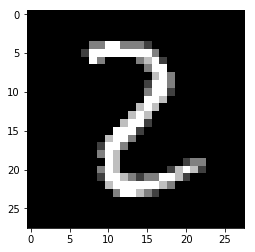

In [7]:
X=batch_xs
X=X.reshape([28,28])
plt.gray()
print (batch_ys)
plt.imshow(X)


In [8]:
x=tf.placeholder(tf.float32,[None,784])
w=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
y=tf.nn.softmax(tf.matmul(x,w)+b)
y_=tf.placeholder(tf.float32,[None,10])
cross_entropy=(tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1])))
train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess=tf.InteractiveSession()
tf.global_variables_initializer().run()
for _ in range(1000):
    batch_x,batch_y=mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x:batch_x,y_:batch_y})
               

In [9]:
prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(prediction,tf.float32))
print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels}))

0.9196


In [11]:
file_writer = tf.summary.FileWriter('logs', sess.graph)

In [ ]:
!tensorboard --logdir path/to/logs

2018-04-02 16:49:08.465578: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2018-04-02 16:49:08.465636: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2018-04-02 16:49:08.465671: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2018-04-02 16:49:08.465698: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2018-04-02 16:49:08.465725: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't